# Import the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('Admission_Predict.csv')

# Display First 5 Rows of The Dataset

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Check Last 5 Rows of The Dataset

In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
df.shape

(400, 9)

In [6]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 400
Number of Columns 9


# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Check Null Values In The Dataset

In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Get Overall Statistics About The Dataset

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Dropping Irrelevant Features

In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
df = df.drop(columns = ['Serial No.'], axis=1)

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Store Indepedent features in 'x' and dependent features in 'y'

In [13]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
x = df.drop(columns = ['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

# Splitting The Dataset Into The Training Set And Testing Set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [17]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [18]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

In [19]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [20]:
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Chance of Admit , Length: 80, dtype: float64

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [23]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [24]:
X_test

array([[-1.4057073 , -0.57209936, -0.057308  ,  0.12715607,  0.61348253,
        -0.79612211,  0.92761259],
       [-0.51865083, -0.90435307, -0.057308  ,  1.10763663,  0.61348253,
         0.08881255,  0.92761259],
       [ 2.05381293,  1.0891692 ,  1.6892215 ,  0.61739635,  0.61348253,
         1.72253809,  0.92761259],
       [ 0.72322823,  0.09240806,  0.81595675,  1.10763663,  0.61348253,
         0.80356748,  0.92761259],
       [-1.4057073 , -1.73498736, -0.93057275, -0.36308421, -0.50194025,
        -1.2045535 ,  0.92761259],
       [ 2.05381293,  1.25529606,  1.6892215 ,  1.10763663,  1.17119391,
         1.46726848,  0.92761259],
       [-1.76052989, -1.90111421, -0.93057275, -0.85332449, -2.17507441,
        -1.18753552, -1.07803625],
       [-1.22829601, -1.40273364, -0.057308  , -1.34356476, -1.05965163,
        -1.57894893, -1.07803625],
       [-0.42994518, -0.40597251, -0.93057275, -1.34356476, -1.05965163,
        -0.23452896, -1.07803625],
       [ 0.54581693,  0.9230

# Import the regression models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [26]:
lr =LinearRegression()
lr.fit(x_train,y_train)

svm = SVR()
svm.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [27]:
y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

# Evaluating the Algorithm

In [28]:
from sklearn.metrics import r2_score

In [29]:
score1 = r2_score(y_test,y_pred1)
score2 = r2_score(y_test,y_pred2)
score3 = r2_score(y_test,y_pred3)
score4 = r2_score(y_test,y_pred4)

In [30]:
print(score1, score2, score3, score4)

0.8212082591486991 0.6348008667533295 0.8122081811828559 0.796040778547672


In [31]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GR'],
                          'R2_SCORE':[score1,score2,score3,score4]})

In [32]:
final_data

,Models,R2_SCORE
0,LR,0.821208
1,SVR,0.634801
2,RF,0.812208
3,GR,0.796041


<Axes: xlabel='Models', ylabel='R2_SCORE'>

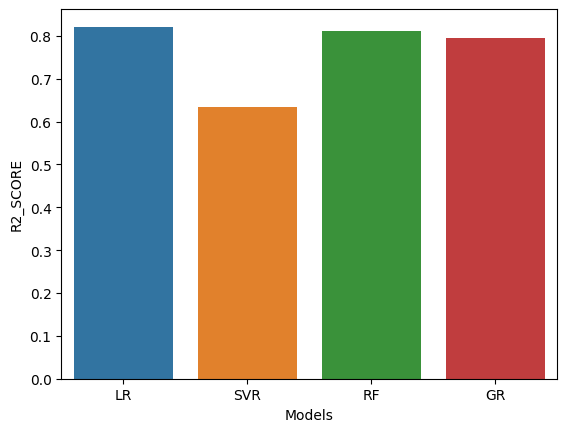

In [33]:
sns.barplot(x = final_data['Models'],y = final_data['R2_SCORE'])

# Classification

In [34]:
# Setting the threshold value for target column
Y_train = [1 if value > 0.7 else 0 for value in y_train]
Y_test = [1 if value > 0.7 else 0 for value in y_test]

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [35]:
Y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [36]:
#get unique values and counts of each value
unique, counts = np.unique(Y_train, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  0 132]
 [  1 188]]


# Import The classification models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Model Training & Evaluation

In [38]:
log = LogisticRegression()
log.fit(x_train,Y_train)
Y_pred1= log.predict(x_test)
acc1 = accuracy_score(Y_test,Y_pred1)
print(acc1)

0.8125


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
svc = SVC()
svc.fit(x_train,Y_train)
Y_pred2 = svc.predict(x_test)
acc2 = accuracy_score(Y_test,Y_pred2)
print(acc2)

0.775


In [40]:
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
Y_pred3 = knn.predict(x_test)
acc3 = accuracy_score(Y_test,Y_pred3)
print(acc3)

0.875


In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred4 = rfc.predict(X_test)
acc4 = accuracy_score(Y_test,Y_pred4)
print(acc4)

0.8625


In [42]:
grc = GradientBoostingClassifier()
grc.fit(X_train,Y_train)
Y_pred5 = grc.predict(X_test)
acc5 = accuracy_score(Y_test,Y_pred5)
print(acc5)

0.8375


In [43]:
classification_data = pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                           'ACC_SCORE':[acc1, acc2, acc3, acc4, acc5]})

In [44]:
classification_data

,Models,ACC_SCORE
0,LR,0.8125
1,SVC,0.7750
2,KNN,0.8750
3,RF,0.8625
4,GBC,0.8375


<Axes: xlabel='Models', ylabel='ACC_SCORE'>

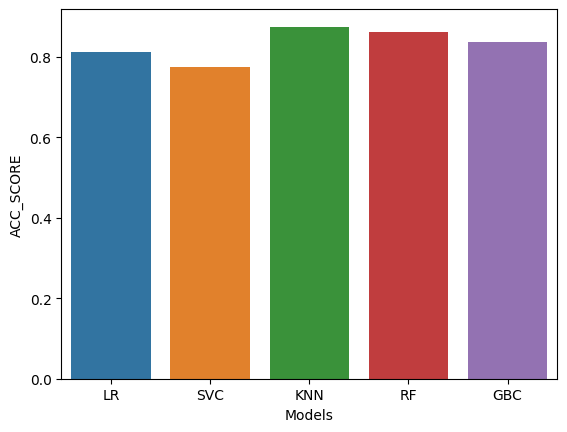

In [45]:
sns.barplot(x = classification_data['Models'], y = classification_data['ACC_SCORE'])

# Save The Model

In [46]:
X = df.drop(columns = ['Chance of Admit '],axis=1)
Y = df['Chance of Admit ']

In [47]:
X = scaler.fit_transform(X)

In [48]:
Y  = [1 if value > 0.7 else 0 for value in Y]
Y = np.array(Y)
Y

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [49]:
KNN = KNeighborsClassifier()
KNN.fit(X, Y)

KNeighborsClassifier()

In [50]:
import joblib
joblib.dump(KNN,'admission_KNN_model')

['admission_KNN_model']

In [51]:
model = joblib.load('admission_KNN_model')

In [52]:
model.predict(scaler.transform([[337,118,4,4.5,4.5,9.65,1]]))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])